<!-- 1. Data Collection and Preparation -->

In [88]:
# Import necessary libraries

# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [89]:
# Read the Dataset
df = pd.read_csv("patient_data.csv")
df.head()


,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [90]:
df.shape

(1825, 14)

In [91]:
df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C                1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


<!-- Data Preprocessing  -->

In [93]:
" Data Preprocessing - handling missing values "

# Replace blank strings and 'Unknown' with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.replace('Unknown', np.nan, inplace=True)

# View missing values in each column
print("Missing values before filling:\n", df.isnull().sum())

# Fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)  # Mode for categorical
        else:
            df[column].fillna(df[column].median(), inplace=True)  # Median for numeric

# Confirm missing values are handled
print("Missing values after filling:\n", df.isnull().sum())


Missing values before filling:
 C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64
Missing values after filling:
 C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64


In [94]:
categorical_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
        df[col] = df[col].replace("121- 130", "121 - 130")
        df[col] = le.fit_transform(df[col])
        print(f"Encoded {col} with classes: {le.classes_}")
        print(f"Unique values in {col}: {df[col].unique()}")
        categorical_columns.append(col)

Encoded C with classes: ['Female' 'Male']
Unique values in C: [1 0]
Encoded Age with classes: ['18-34' '35-50' '51-64' '65+']
Unique values in Age: [0 1 2 3]
Encoded History with classes: ['No' 'Yes']
Unique values in History: [1 0]
Encoded Patient with classes: ['No' 'Yes']
Unique values in Patient: [0 1]
Encoded TakeMedication with classes: ['No' 'Yes']
Unique values in TakeMedication: [0 1]
Encoded Severity with classes: ['Mild' 'Moderate' 'Sever']
Unique values in Severity: [0 2 1]
Encoded BreathShortness with classes: ['No' 'Yes']
Unique values in BreathShortness: [0 1]
Encoded VisualChanges with classes: ['No' 'Yes']
Unique values in VisualChanges: [0 1]
Encoded NoseBleeding with classes: ['No' 'Yes']
Unique values in NoseBleeding: [0 1]
Encoded Whendiagnoused with classes: ['1 - 5 Years' '<1 Year' '>5 Years']
Unique values in Whendiagnoused: [1 0 2]
Encoded Systolic with classes: ['100+' '111 - 120' '121 - 130' '130+']
Unique values in Systolic: [1 2 3 0]
Encoded Diastolic with 

<!-- 2. Exploratory Data Analysis (EDA) -->

In [96]:
# 1. Descriptive Statistical Analysis

# General statistics for numeric features
print(df.describe())

# Distribution of the target variable
print("\nTarget variable ('Stages') class distribution:")
print(df['Stages'].value_counts())


                 C          Age      History      Patient  TakeMedication  \
count  1825.000000  1825.000000  1825.000000  1825.000000     1825.000000   
mean      0.499726     1.441096     0.907945     0.460822        0.592329   
std       0.500137     1.098723     0.289183     0.498599        0.491536   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     1.000000     0.000000        0.000000   
50%       0.000000     1.000000     1.000000     0.000000        1.000000   
75%       1.000000     2.000000     1.000000     1.000000        1.000000   
max       1.000000     3.000000     1.000000     1.000000        1.000000   

          Severity  BreathShortness  VisualChanges  NoseBleeding  \
count  1825.000000      1825.000000    1825.000000   1825.000000   
mean      1.013151         0.465205       0.484932      0.243836   
std       0.786287         0.498925       0.499910      0.429512   
min       0.000000         0.00000

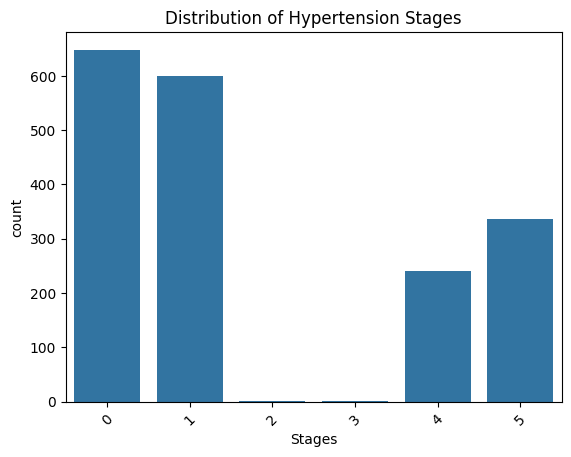

In [97]:
# 2. Visual Analysis

" Target variable distribution "

# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x='Stages', data=df)
plt.title("Distribution of Hypertension Stages")
plt.xticks(rotation=45)
plt.show()


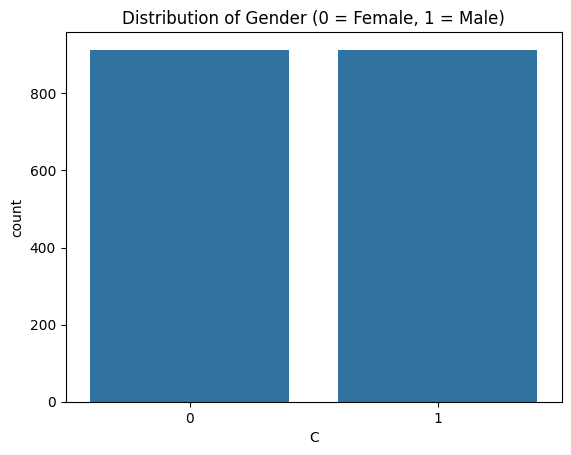

In [12]:
" Gender distribution "

sns.countplot(x='C', data=df)
plt.title("Distribution of Gender (0 = Female, 1 = Male)")
plt.show()


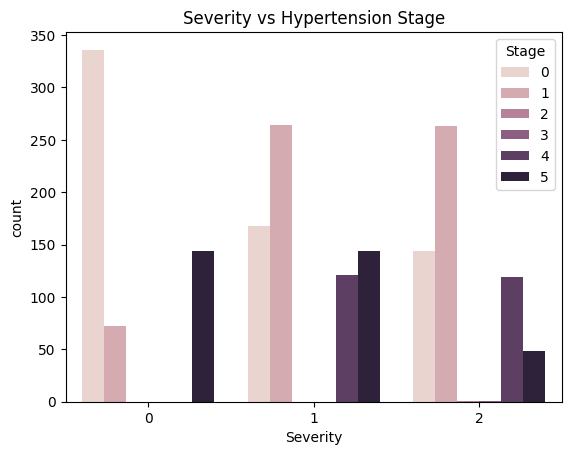

In [98]:
" Severity vs Stages "

sns.countplot(x='Severity', hue='Stages', data=df)
plt.title("Severity vs Hypertension Stage")
plt.legend(title='Stage')
plt.show()


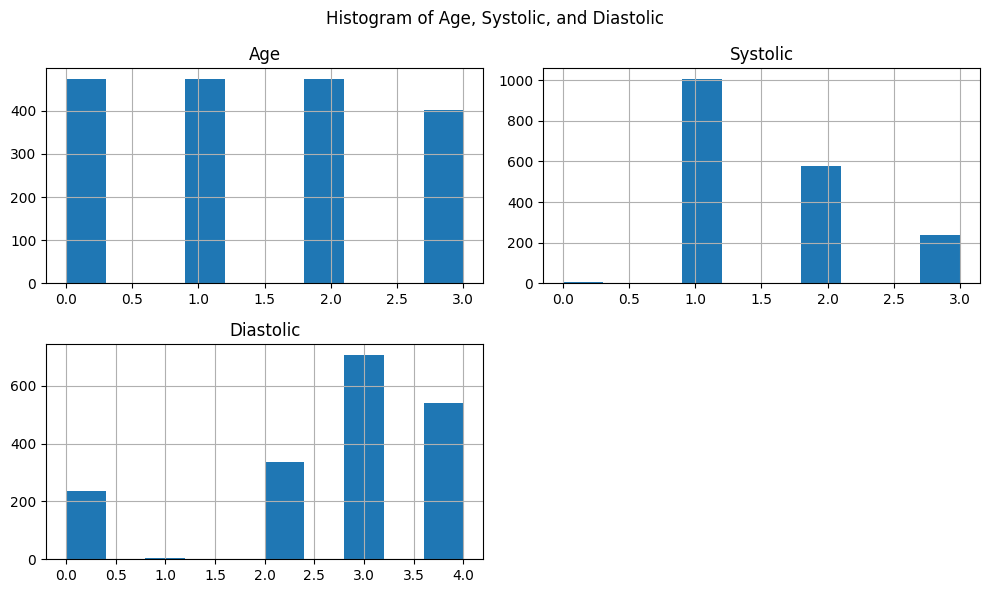

In [99]:
# 3. Univariate Analysis

" Distribution of individual variables "

# Histogram for numerical variables
df[['Age', 'Systolic', 'Diastolic']].hist(bins=10, figsize=(10, 6))
plt.suptitle("Histogram of Age, Systolic, and Diastolic")
plt.tight_layout()
plt.show()


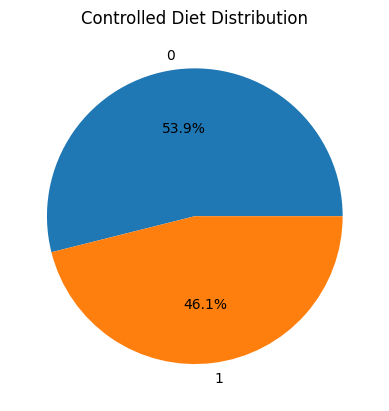

In [100]:
# Pie chart for ControlledDiet
diet_counts = df['ControlledDiet'].value_counts()
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%')
plt.title("Controlled Diet Distribution")
plt.show()


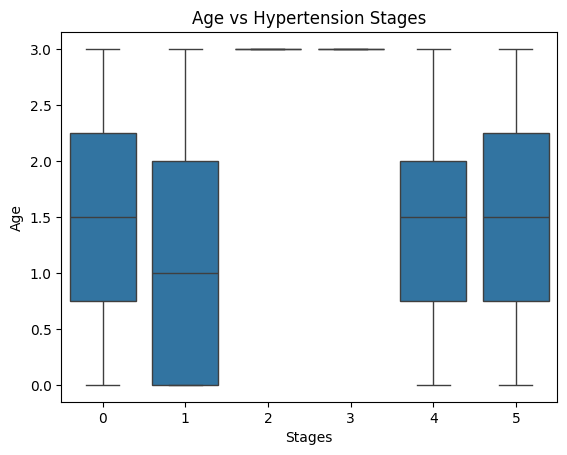

In [101]:
# 4. Bivariate Analysis -> How two variables relate — like one feature vs target.

" Age vs Stages "

sns.boxplot(x='Stages', y='Age', data=df)
plt.title("Age vs Hypertension Stages")
plt.show()


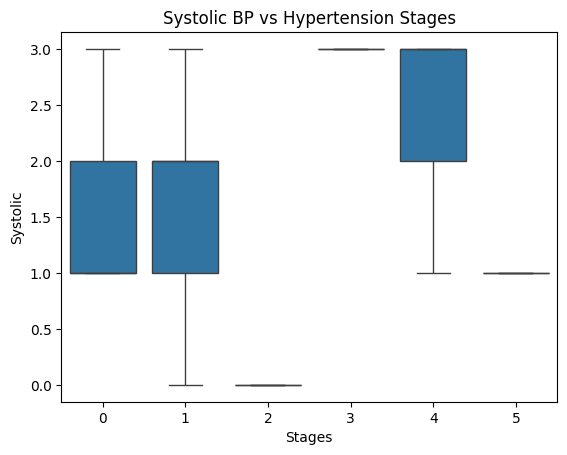

In [102]:
" Systolic vs Stages "

sns.boxplot(x='Stages', y='Systolic', data=df)
plt.title("Systolic BP vs Hypertension Stages")
plt.show()


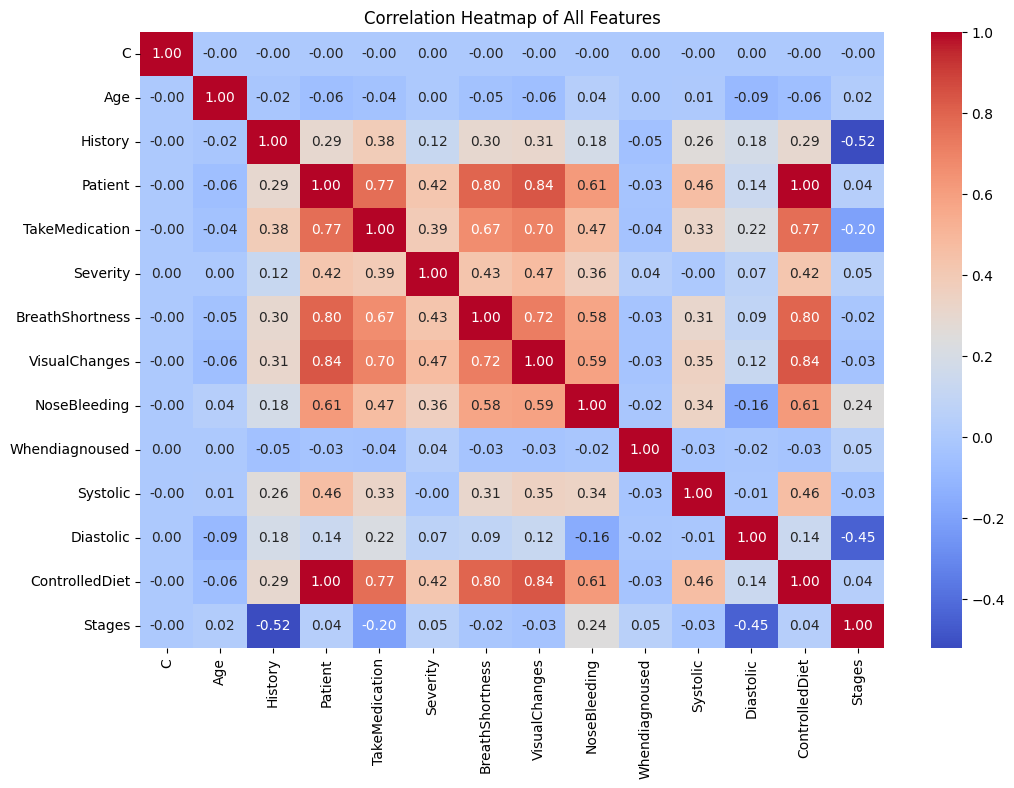

In [103]:
# 5. Multivariate Analysis -> All features together to see combined relationships.

" Heatmap of feature correlation "

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()


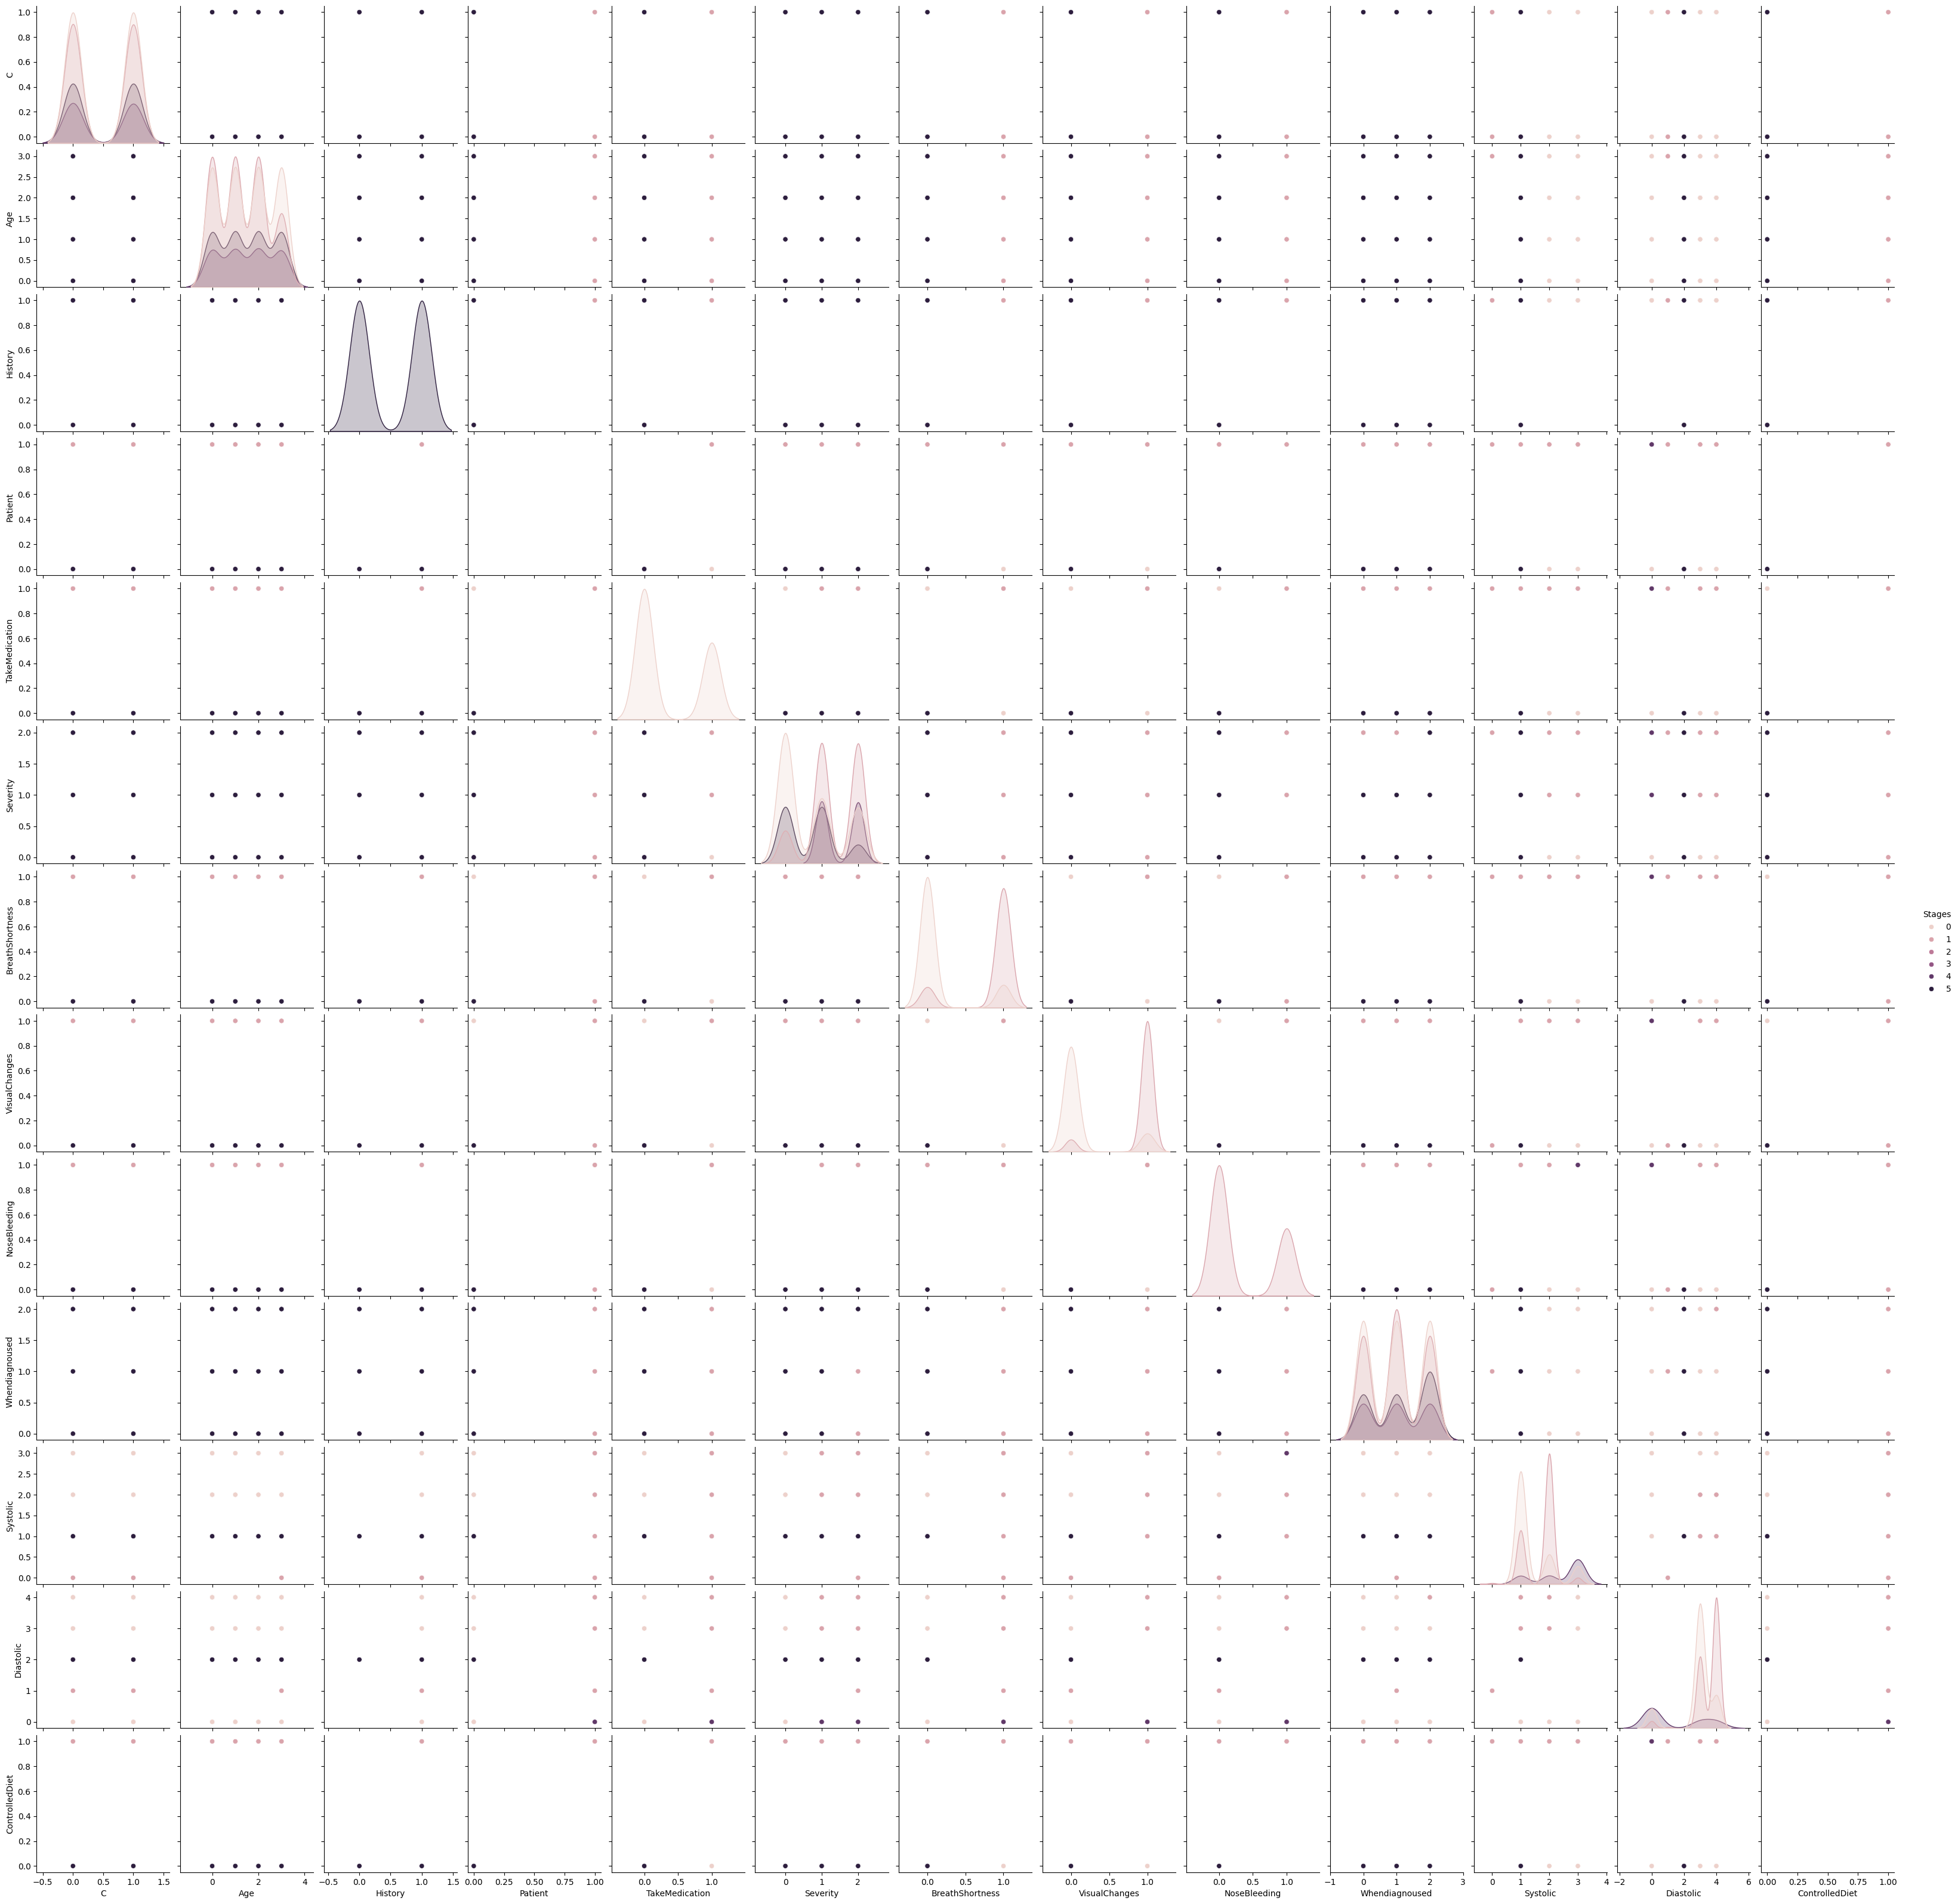

In [104]:
" Pairplot "

# WARNING: Can be slow on large datasets
sns.pairplot(df, hue='Stages')
plt.show()

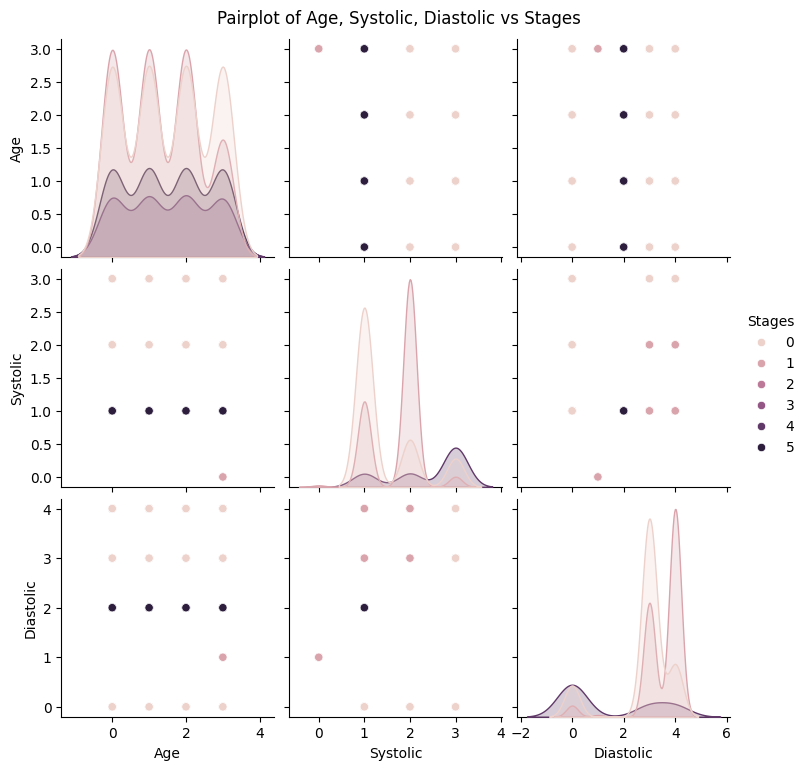

In [105]:
# Select only a few meaningful features
selected_features = ['Age', 'Systolic', 'Diastolic', 'Stages']

# Create pairplot
sns.pairplot(df[selected_features], hue='Stages', diag_kind='kde')
plt.suptitle("Pairplot of Age, Systolic, Diastolic vs Stages", y=1.02)
plt.show()

<!-- 3. Model Building -->

In [109]:
# 1. Train-Test Split

# from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Stages', axis=1)
y = df['Stages']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (1460, 13), Testing data: (365, 13)


In [107]:
# Import required models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store model performance
model_results = {}

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log),
    'report': classification_report(y_test, y_pred_log),
    'confusion': confusion_matrix(y_test, y_pred_log)
}

# 2. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'report': classification_report(y_test, y_pred_rf),
    'confusion': confusion_matrix(y_test, y_pred_rf)
}

# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
model_results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'report': classification_report(y_test, y_pred_dt),
    'confusion': confusion_matrix(y_test, y_pred_dt)
}

# 4. Gaussian Naive Bayes   # This is the best in testing with 0.9989
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
model_results['Gaussian NB'] = {
    'accuracy': accuracy_score(y_test, y_pred_gnb),
    'report': classification_report(y_test, y_pred_gnb),
    'confusion': confusion_matrix(y_test, y_pred_gnb)
}

# 5. Multinomial Naive Bayes (requires non-negative values)
scaler = MinMaxScaler()
X_train_mnb = scaler.fit_transform(X_train)
X_test_mnb = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
model_results['Multinomial NB'] = {
    'accuracy': accuracy_score(y_test, y_pred_mnb),
    'report': classification_report(y_test, y_pred_mnb),
    'confusion': confusion_matrix(y_test, y_pred_mnb)
}

# Display all accuracies
print("Model Accuracies:")
for name, result in model_results.items():
    print(f"{name}: {result['accuracy']:.4f}")


Model Accuracies:
Logistic Regression: 0.9644
Random Forest: 1.0000
Decision Tree: 1.0000
Gaussian NB: 0.8904
Multinomial NB: 0.8027


In [108]:
print(X_train[0:1])
print(y_train.head())

     C  Age  History  Patient  TakeMedication  Severity  BreathShortness  \
859  1    2        1        1               1         2                1   

     VisualChanges  NoseBleeding  Whendiagnoused  Systolic  Diastolic  \
859              1             1               1         1          0   

     ControlledDiet  
859               1  
859     4
1022    1
170     0
292     4
1146    0
Name: Stages, dtype: int64


<!-- 4. Performance testing and Hyper Parameter Tunning -->

In [34]:
# Overfitting and Underfitting Analysis

from sklearn.model_selection import cross_val_score

print("\n🔍 Overfitting Check:\n")

for name, model in zip(
    ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gaussian NB', 'Multinomial NB'],
    [log_reg, rf, dt, gnb, mnb]
):
    print(f"--- {name} ---")
    
    if name == 'Multinomial NB':
        X_tr, X_te = X_train_mnb, X_test_mnb
    else:
        X_tr, X_te = X_train, X_test

    train_acc = model.score(X_tr, y_train)
    test_acc = model.score(X_te, y_test)
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    
    # Cross-validation score
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-Validation Accuracy (mean of 5 folds): {scores.mean():.4f}")
    print("-" * 40)



🔍 Overfitting Check:

--- Logistic Regression ---
Train Accuracy: 0.9856
Test Accuracy:  0.9863


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (mean of 5 folds): 0.9260
----------------------------------------
--- Random Forest ---
Train Accuracy: 0.9986
Test Accuracy:  1.0000


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (mean of 5 folds): 0.9595
----------------------------------------
--- Decision Tree ---
Train Accuracy: 0.9986
Test Accuracy:  1.0000
Cross-Validation Accuracy (mean of 5 folds): 0.9468
----------------------------------------
--- Gaussian NB ---
Train Accuracy: 0.9993
Test Accuracy:  1.0000
Cross-Validation Accuracy (mean of 5 folds): 0.9989
----------------------------------------
--- Multinomial NB ---
Train Accuracy: 0.8219
Test Accuracy:  0.8384
Cross-Validation Accuracy (mean of 5 folds): 0.7710
----------------------------------------


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


<!--5. Model Deployment -->

In [110]:
# 1. Save the best model
import pickle

# Save the GaussianNB model to a .pkl file
with open('gaussian_nb_model.pkl', 'wb') as f:
    pickle.dump(gnb, f)

print("✅ GaussianNB model saved as 'gaussian_nb_model.pkl'")


✅ GaussianNB model saved as 'gaussian_nb_model.pkl'


In [111]:
# Save the encoded file
with open('label_encoder_model.pkl', 'wb') as f:
    pickle.dump(le, f)

In [38]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,1,1,3,0,0
1,0,0,1,0,0,0,0,0,1,1,1,3,0,0
2,1,1,1,0,0,0,0,0,1,1,1,3,0,0
3,0,1,1,0,0,0,0,0,1,1,1,3,0,0
4,1,2,1,0,0,0,0,0,1,1,1,3,0,0


In [41]:
df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,1,1,3,0,0
1,0,0,1,0,0,0,0,0,1,1,1,3,0,0
2,1,1,1,0,0,0,0,0,1,1,1,3,0,0
3,0,1,1,0,0,0,0,0,1,1,1,3,0,0
4,1,2,1,0,0,0,0,0,1,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,1,2,1,2,0,5
1821,1,2,1,0,0,2,0,0,1,2,1,2,0,5
1822,0,2,1,0,0,2,0,0,1,2,1,2,0,5
1823,1,3,1,0,0,2,0,0,1,2,1,2,0,5


In [112]:
model.predict([[1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 4, 4, 1]])


array([1])